# Assignment: Decision Trees and Random Forests

## Business Understanding

The objectives of this assignment are:
- to learn to use decision trees to build a transparent, human-readable predictive model.
- to learn to use random forests for improved predictive performance.


In [297]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

# fetch dataset 
phishing_websites = fetch_ucirepo(id=327) 
data = phishing_websites.data.original


##  Data Understanding

The dataset consist of multiple features extracted from website URLSs and their associated metadata. These features describe characteristics commonly used to indentify phishing websites, such as the presence of IP addresses in URLS, abnormal URL lengths, usage of URL shortening services, and SSL certificate properties.

Each features takes discrete values (-1, 0, 1), representing phishing, suspicious, or legitimate behavior respectively.

The target variable 'result' indicates whether a website is phishing (-1) or legitimate (1).

In [298]:
data.head()

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


## Data Preparation

The dataset was divided into features and a target variable. All columns except 'result' were used as input features, while the 'result' column was selected as the target variable. The target indicates whether a website is legitimate or a phishing website, making this a binary classification task

In [299]:
X = data.drop(['result'], axis = 1)
y = data['result']

There we split dataset into training and testing sets, using 75% of the data for training and 25% for testing. Stratified sampling was applied to preserve the class distribution between phishing and legitimate websites in both subsets.

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=20)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6633, 30) (6633,) (4422, 30) (4422,)


## Modeling

Here we train Decision tree using the training data. The maximum depth of the tree was limited to prevent overfitting and to keep model interpretable. Decision tree classify data by learning a set of hierarchical decision rules based on feature values.

In [301]:
dc_model = DecisionTreeClassifier(max_depth=2, random_state=42)
dc_model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",2
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

There we visualize a Decision tree to examine how model makes classification decisions. The visualization illustrates which features are used at each split and how they contribute to predicting whether a website is phishing or legitimate.

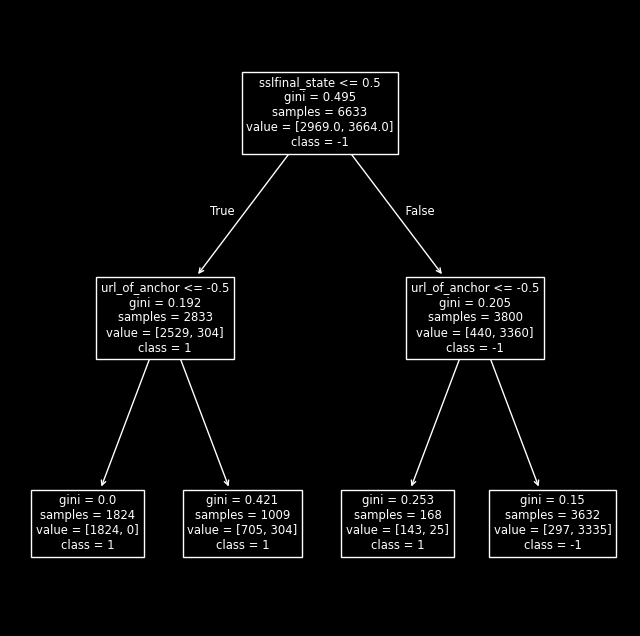

In [302]:
dc_fig = plt.figure(figsize=(8, 8))
plot_tree(dc_model, feature_names = X.keys(), class_names = ['1', '-1'])

The Decision trees model was evaluated on the test set by generating predictions and computing a confusion matrix. The confusion matrix provides insight into corect and incorrect classifications, highlighting false positives and false negatives.

In [303]:
from sklearn.metrics import confusion_matrix, classification_report

dt_pred = dc_model.predict(X_test)
confusion_matrix(y_test, dt_pred)

array([[1753,  176],
       [ 234, 2259]])

And here we train Random Forest classifier using same training data. The model consist of multiple decision trees, each trained on a random subset of the data. By aggregating the predictions of individual trees, Random forest reduces overfitting and improves generalization compared to a single Desicion tree.

In [304]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_depth=15,random_state=42)
rf_model.fit(X_test, y_test)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [305]:
from sklearn.model_selection import cross_val_score

rf_scores = cross_val_score(rf_model, X, y, cv=10)

print(f'Fold-specific accuracies: {rf_scores}')
print(f'Overall accuracy (avg. of folds): {rf_scores.mean():.4f}')

Fold-specific accuracies: [0.97830018 0.9801085  0.96292948 0.98462929 0.97920434 0.97737557
 0.9638009  0.95384615 0.96470588 0.96651584]
Overall accuracy (avg. of folds): 0.9711


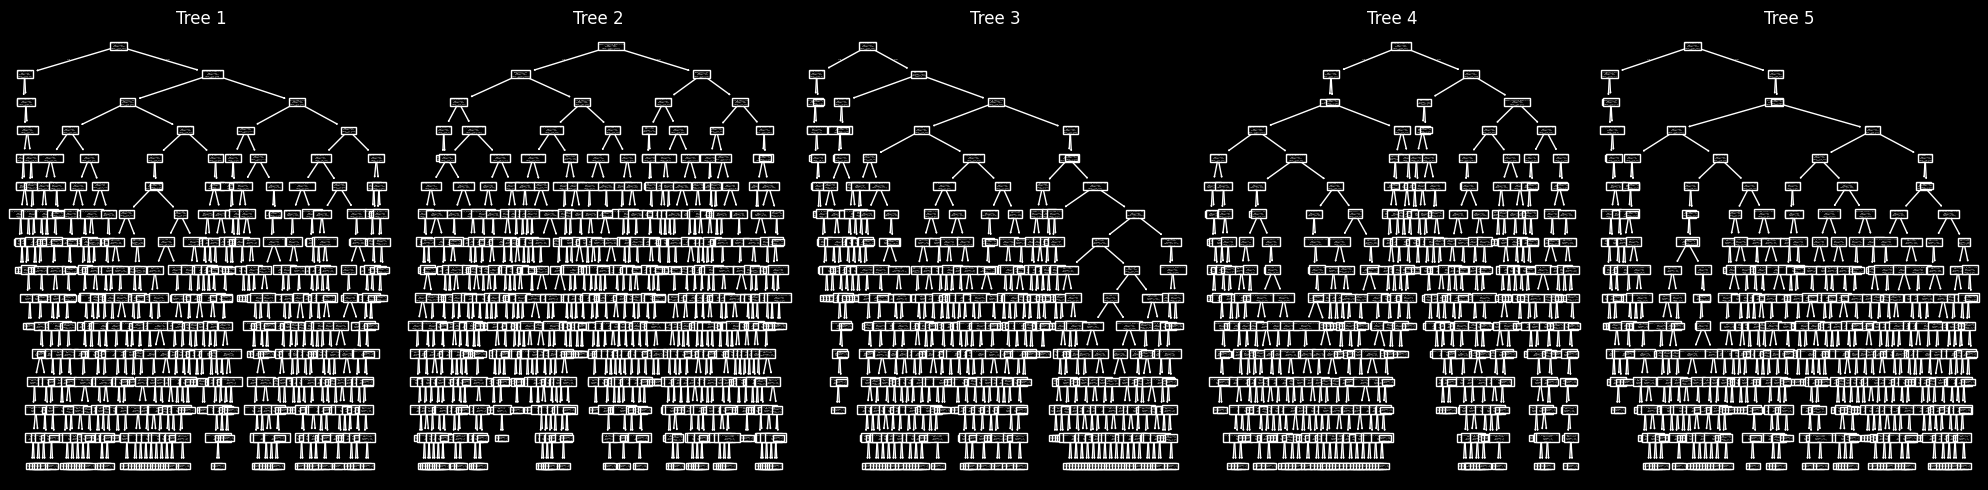

In [306]:
n_trees_to_plot = 5

plt.figure(figsize=(20, 5))

for i in range(n_trees_to_plot):
    plt.subplot(1, n_trees_to_plot, i+1)
    plot_tree(rf_model.estimators_[i], feature_names = X.columns, class_names = ['1', '-1'])
    plt.title(f'Tree {i+1}')

plt.tight_layout()
plt.show()

In [307]:
y_pred = rf_model.predict(X_test)
print(f'Confusion matrix: {confusion_matrix(y_test, y_pred)}')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Confusion matrix: [[1897   32]
 [  25 2468]]
              precision    recall  f1-score   support

          -1       0.99      0.98      0.99      1929
           1       0.99      0.99      0.99      2493

    accuracy                           0.99      4422
   macro avg       0.99      0.99      0.99      4422
weighted avg       0.99      0.99      0.99      4422



## Evaluation

Model

In [309]:
#from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

#def evaluate_model(y_true, y_pred):
 #   return {
  #      'accuracy': accuracy_score(y_true, y_pred), #Prediction accuracy
   #     'precision': precision_score(y_true, y_pred, pos_label=-1), #Positive phishing precisions
    #    'recall': recall_score(y_true, y_pred, pos_label=-1), #Identified phishing sites
    #}

#dt_scores = evaluate_model(y_test, dt_pred)
#rf_scores = evaluate_model(y_test, rf_pred)




In [310]:
#confusion_matrix(y_test, dt_pred)

array([[1753,  176],
       [ 234, 2259]])

In [311]:
#confusion_matrix(y_test, rf_pred)

ValueError: Found input variables with inconsistent numbers of samples: [4422, 2764, 4422]

## Deployment